In [21]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
from tensorly.decomposition import parafac,non_negative_parafac
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_test = pd.read_csv('./Testing Data/K036VRÁS-RS211.csv',index_col=0)
df_test.index = pd.DatetimeIndex(df_test.CTime)
df_test = df_test.loc[df_test.OkPct >= 98]
df_test = df_test.loc[df_test.Flag == 524480]


In [2]:
x = df_test.loc[(df_test.CType == 4) & (df_test.Val > 0),:].Val
x = x.resample('1h').mean()
x = x.fillna(method='ffill')
weekhour_index = x.index.weekday * 24 + x.index.hour
first_0 = np.argwhere(weekhour_index == 0)[0,0]
last_0 = np.argwhere(weekhour_index == 0)[-1,0]
x = x.iloc[first_0:last_0]
X = x.values.reshape((-1,7,24))

In [19]:
x_weekly_rolling = (x - x.rolling(168).mean()).values.reshape((-1,7,24))

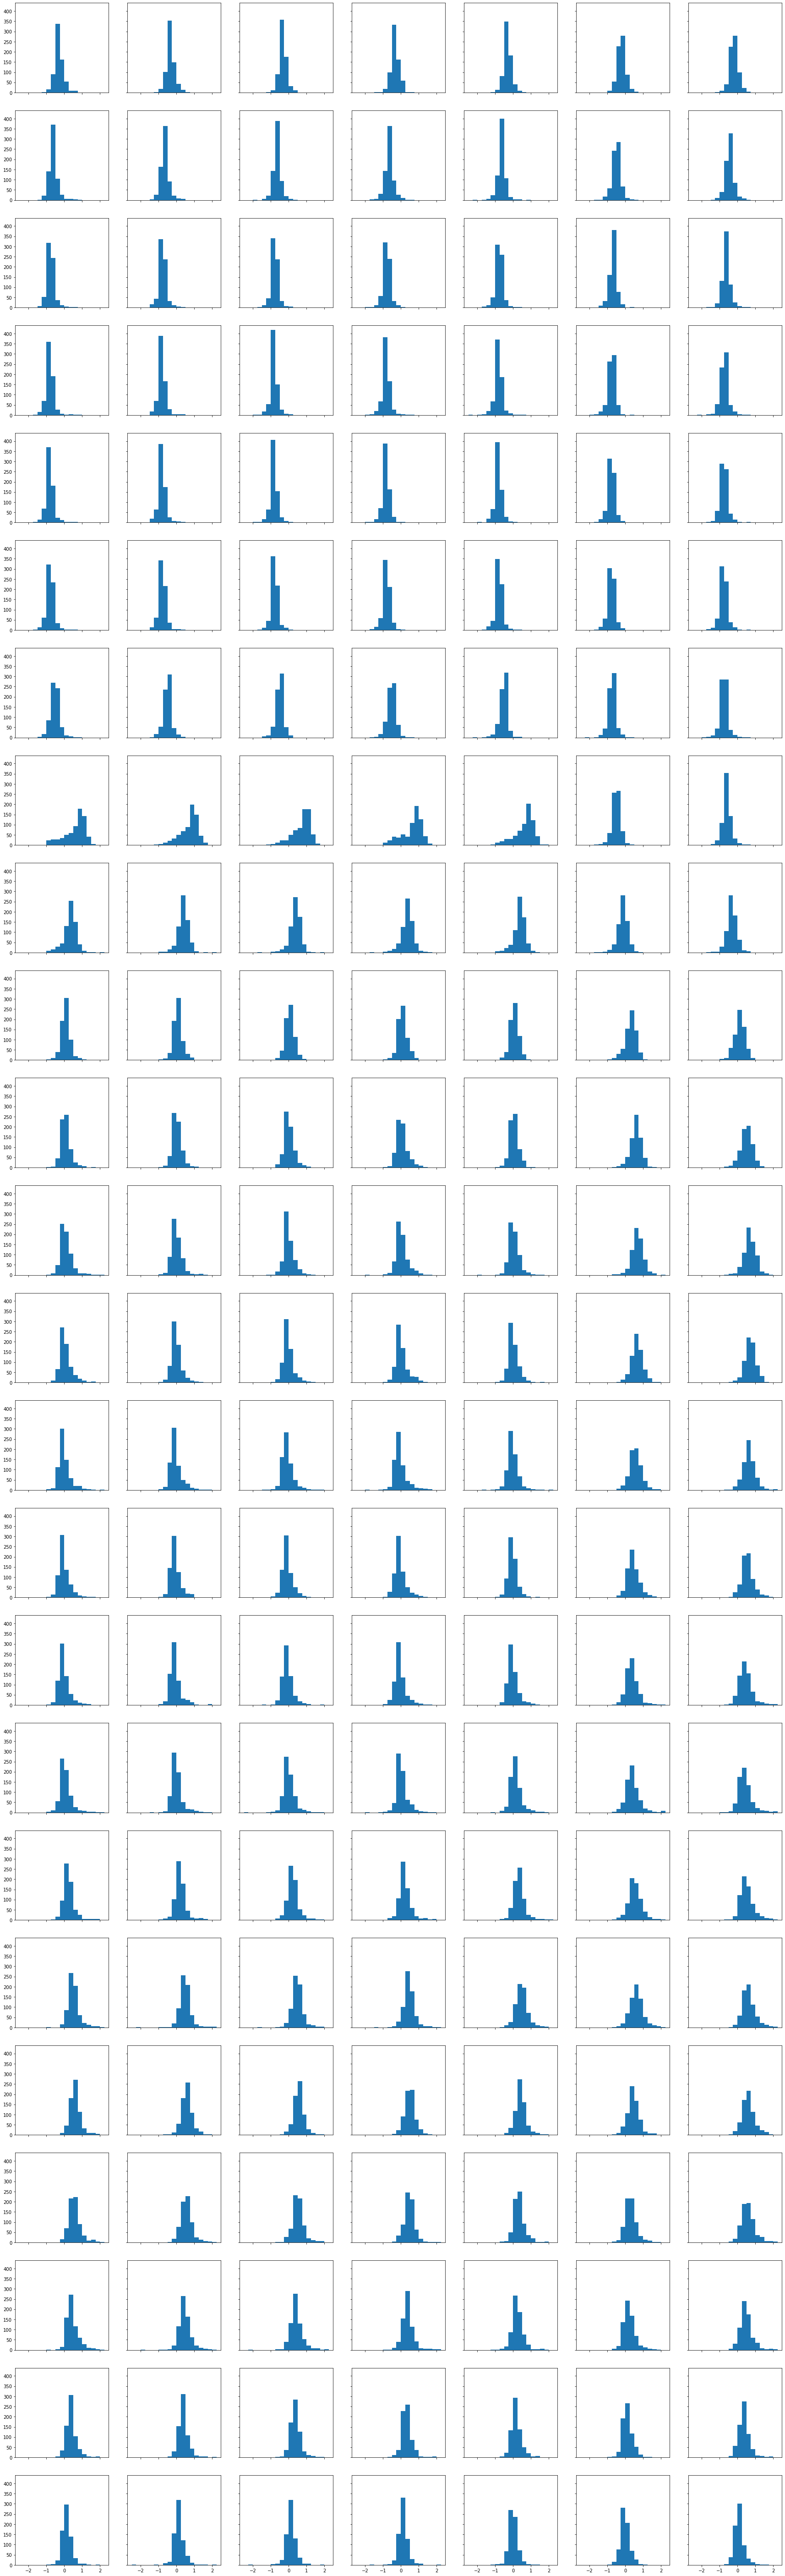

In [24]:
f,ax = plt.subplots(24,7,figsize=(30,30/7*24),sharex=True,sharey=True)

for hour,axrow in enumerate(ax):
    for day, ax in enumerate(axrow):
        ax.hist(x_weekly_rolling[:,day,hour],bins=np.arange(-2.5,2.5,0.25)); 
plt.show()